<b>
<p>
<center>
<font size="5">
DATS 6202 Machine Learning I Final Report
</font>
</center>
</p>
    
<p>
<center>
<font size="5">
Fraud Detection
</font>
</center>
</p>

<p>
<center>
<font size="3">
Mariko McDougall, Arathi Nair, Stefani Guevara
</font>
</center>
</p>

# Overview

This notebook constitutes our final project. It begins with the written section of our report followed by the code for our experiment. Here we will work on the kaggle competation [IEEE-CIS Fraud Detection dataset](https://https://www.kaggle.com/c/ieee-fraud-detection). We will tweak the provided  pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s4 shallow neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2021/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s4_shallow_neural_networks/case_study/case_study.ipynb) to make it work for the new kaggle competation mentioned above.


# Introduction

According to WalletHub, as of 2020 the United States collectively holds almost $1 trillion in credit card debt. With a substantial volume of credit card transactions executed daily, online and in person, security is paramount to both card holders and the card companies themselves. As fraudulent activity results in millions of dollars worth of losses every year, fraud detection has thus become a necessity to all parties. Moreover, as this preventative measure becomes more expected of credit card companies by consumers, a high degree of accuracy increasingly does as well. 

In this project, we take the data from the IEEE-CIS Fraud Detection kaggle competition and use the machine learning techniques dicussed in the course to develop a model that predicts the probability of a fraudulent transaction. The training and test datasets constitute anonymized e-commerce transactions provided by Vesta Corporation. We take these data through the pipeline implemented in the shallow neural network case study provided under Professor Yuxiao (James) Huang’s GitHub repository and use it to obtain a baseline score. After fine-tuning our model, our results show that we were able to predict the likelihood of fraudulent activity with a 91.0% accuracy rate. 


# Experiment

## Data Pre-Processing & EDA

Both the training and testing data were initially obtained in two separate dataframes - Transactions and Identity. 

The Transaction dataframe contains details about the potentially fraudulent transactions, in several categories. Each transaction has a datetime associated, the amount spent, the product purchased, location of purchase, purchaser and recipient email address domains, and relative distance to previous purchases. Information about the credit card used to make the transaction is also supplied, including the brand of card, issue bank and card numbers. Numeric information follows, such as the anonymized number of addresses and how many matches there are to known data about the card and card holder. Finally follows a series of engineered features, produced by the Vesta Corporation which created the competition. There are 399 of these engineered columns.
	
The identity table includes the type of device and connection used to conduct the transaction, as well as several anonymized identity columns. The connection information specifies if the transaction was made using a mobile, desktop, or unknown platform. The Device type specifies the exact model of phone or version of operating system in the case of desktop. 

For both of the dataframes there was a column for TransactionID, with a unique value for each transaction. The transaction and identity dataframes were left merged together on the TransactionID column, to form one dataframe.

Due to the scale of the data, and the limited resources for processing, some feature engineering prior to entry to the pipeline was required. Primarily, this consisted of the removal of several columns, including the addresses and all engineered features, as well as consolidating the DeviceInfo column from individual models of device into the brand of device.


## Hyperparameter Tuning & Model Selection

In order to predict credit card fraud and to classify the transactions as fraudulent or non-fraudulent, we applied four machine learning models - MLP Classifier, Random Forest Classifier, Logistic Regression and Hist Gradient Boosting Classifier on the training and validation data to solve this binary classification problem. The table below shows the accuracy scores obtained after fine tuning the hyperparameters for each model using Grid Search CV from Sklearn.

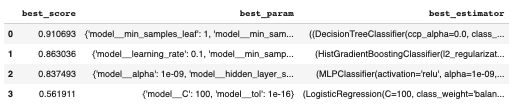

Random Forest Classifier model was the top performing model, which gave us the highest validation score of 91% and training score of 99.5%. This score was achieved by setting the parameters class_weight = “balanced”, number of estimators = 75, minimum number of samples at a leaf node = 1, minimum number of samples required to split = 5 and maximum feature subset size = 24.

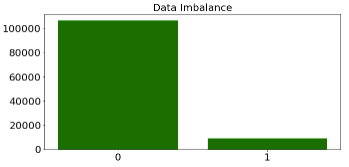

However, since over 95% of the transactions in this dataset is classified as non-fraudulent, as illustrated in the figure above, a model could achieve a 95% or higher accuracy score if it were to classify all the transactions as non-fraudulent, which can be misleading. Therefore, accuracy alone is not sufficient to measure a model’s performance, particularly with an unbalanced data. To eliminate this bias, we further assessed the model’s performance by calculating the precision, recall and F1 scores as shown in the table below. Both precision and recall properly identified 97.4% of fraudulent activity as positive and avoided misclassifying them as negative. The obtained F1 score of 97.4% also indicates that our model is able to distinguish between fraudulent and non-fraudulent transactions correctly.

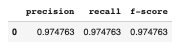


## Feature Importance

We also plotted the important features influencing our model by using the Random Forest’s feature_importances_ attribute. Variables associated with the payment card information, address, transaction amount, transaction time and number of days between transactions were most predictive to detect fraud. The table and graph below show the top key features and their respective importance score.

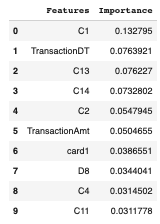
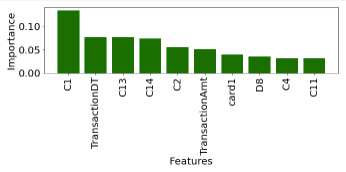

# Conclusion

In this project, we applied the machine learning theory and techniques learned throughout the semester to real data on credit card activity to predict the event of fraudulent transactions. Using the data provided by Vesta Corporation via Kaggle, we built a model that detected fraud with an accuracy score of 91.0%. However, noting that a binary class imbalance problem exists with the original data where 0, or “not-fraud”, is the majority class,  and thus an accuracy measure could be misleading, we moved to re-evaluated our model using the precision, recall, and f1 scores. These scores showed our model in fact correctly predicted the occurrence of a fraudulent transaction 97.4% of the time. 

Among the features used in our model, many of the ten most important indicators of fraud represented the count of a masked variable, a detail regarding information of a card, and a change in time. Unfortunately, as the true meaning of these variables are masked, we are unable to properly analyze our results in relation to them. The only known variable among the top ten features is TransactionAMT which represents the payment amount in USD. This makes sense as any shock to a person’s typical spending habits could be a proper indicator of fraud.


# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/machine_learning_I/Fraud_Detection/'


# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/machine_learning_I/spring_2021/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/machine_learning_I/spring_2021/code/models/p2_shallow_learning/'

Mounted at /content/drive


## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/machine_learning_I/spring_2021/code/utilities/p2_shallow_learning


## Loading the data

We will need to import the data and merge the identity and transactions.

In [7]:
import pandas as pd

#Load the raw training datasets
df_transaction_train = pd.read_csv(abspath_curr + 'train_transaction.csv', header=0)
df_identity_train = pd.read_csv(abspath_curr + 'train_identity.csv', header=0)


#Merge into one training data
df_train = df_transaction_train.merge(df_identity_train, on=['TransactionID'])

# Clean up the imports
del df_transaction_train, df_identity_train


In [8]:
#Load the raw test datasets
df_transaction_test = pd.read_csv(abspath_curr + 'test_transaction.csv', header=0)
df_identity_test = pd.read_csv(abspath_curr + 'test_identity.csv', header=0)

#Merge into one training data
df_test = df_transaction_test.merge(df_identity_test, on=['TransactionID'])

# Clean up the imports
del df_transaction_test, df_identity_test

Modify the Dataframes


In [9]:
#Drop the engineered features
df_train=df_train.drop(['V'+str(i) for i in range(1,339+1)], axis=1)
df_test=df_test.drop(['V'+str(i) for i in range(1,339+1)], axis=1)

#Drop the address, it will not help
df_train = df_train.drop(['addr1', 'addr2'], axis=1)
df_test = df_test.drop(['addr1', 'addr2'], axis=1)

#Find the precentage of non-null values
x=((df_train.shape[0]-(df_train.isnull().sum()))/df_train.shape[0])*100

#Drop all columns that are below the non-null threshold
df_train = df_train.drop(x[x<50].index.to_list(), axis=1)
print(f'Dropped {len(x[x<50].index.to_list())} columns')

Dropped 35 columns


In [10]:
#Drop the columns dropped from the training set in the test set if available
#Reduce processing resources needed later.
count=0
for i in x[x<50].index.to_list():
  try:
    df_test=df_test.drop(i, axis=1)
    count+=1
  except:
    pass
print(f'Dropped {count} columns')

Dropped 23 columns


Consolidate phone models

In [11]:

import re

#Get all phone models compiled into a few main brands for OHE.

df_train.replace(r'SM\-.*$', "SAMSUNG", regex=True, inplace=True) 
df_train.replace("SAMSUNG-SAMSUNG", "SAMSUNG", regex=False, inplace=True) 
df_train.replace("SAMSUNG SAMSUNG", "SAMSUNG", regex=False, inplace=True) 
df_train.replace(r'^rv\:.*$', "rv", regex=True, inplace=True) 
df_train.replace(r'^[Mm]oto.*$', "moto", regex=True, inplace=True) 
df_train.replace(r'.*[Hh][Uu][Aa][Ww][Ee][Ii].*$', "HUAWEI", regex=True, inplace=True) 
df_train.replace(r'LG\-.*$', "LG", regex=True, inplace=True) 
df_train.replace(r'HTC.*$', "HTC", regex=True, inplace=True) 
df_train.replace(r'Pixel.*$', "Pixel", regex=True, inplace=True) 
df_train.replace(r'Linux.*$', "Linux", regex=True, inplace=True) 
df_train.replace(r'Windows.*$', "Windows", regex=True, inplace=True) 
df_train.replace(r'Lenovo.*$', "Lenovo", regex=True, inplace=True) 
df_train.replace(r'Blade.*$', "Blade", regex=True, inplace=True) 
df_train.replace(r'BLADE.*$', "Blade", regex=True, inplace=True) 
df_train.replace(r'Hisense.*$', "Hisense", regex=True, inplace=True) 
df_train.replace(r'Android.*$', "Android", regex=True, inplace=True) 



#Set all that have less than 100 phones to "Other"
x=df_train.DeviceInfo.value_counts()
df_train=df_train.replace(x[x<100].index.to_list(), "Other", regex=False) 


In [12]:
#Get all phone models compiled into a few main brands for OHE.

df_test.replace(r'SM\-.*$', "SAMSUNG", regex=True, inplace=True) 
df_test.replace("SAMSUNG-SAMSUNG", "SAMSUNG", regex=False, inplace=True) 
df_test.replace("SAMSUNG SAMSUNG", "SAMSUNG", regex=False, inplace=True) 
df_test.replace(r'^rv\:.*$', "rv", regex=True, inplace=True) 
df_test.replace(r'^[Mm]oto.*$', "moto", regex=True, inplace=True) 
df_test.replace(r'.*[Hh][Uu][Aa][Ww][Ee][Ii].*$', "HUAWEI", regex=True, inplace=True) 
df_test.replace(r'LG\-.*$', "LG", regex=True, inplace=True) 
df_test.replace(r'HTC.*$', "HTC", regex=True, inplace=True) 
df_test.replace(r'Pixel.*$', "Pixel", regex=True, inplace=True) 
df_test.replace(r'Linux.*$', "Linux", regex=True, inplace=True) 
df_test.replace(r'Windows.*$', "Windows", regex=True, inplace=True) 
df_test.replace(r'Lenovo.*$', "Lenovo", regex=True, inplace=True) 
df_test.replace(r'Blade.*$', "Blade", regex=True, inplace=True) 
df_test.replace(r'BLADE.*$', "Blade", regex=True, inplace=True) 
df_test.replace(r'Hisense.*$', "Hisense", regex=True, inplace=True) 
df_test.replace(r'Android.*$', "Android", regex=True, inplace=True) 


#Set all that have less than 100 phones to "Other"
x=df_test.DeviceInfo.value_counts()
df_test=df_test.replace(x[x<100].index.to_list(), "Other", regex=False) 

In [13]:
# Get the name of the target
target = 'isFraud'

In [14]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,144233,58


In [15]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,141907,69


In [16]:
# Print the first 5 rows of df_train
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,542.0,144.0,New,NotFound,Other,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,621.0,500.0,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,credit,gmail.com,gmail.com,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,83.0,0.0,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,410.0,142.0,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,176.0,507.0,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,debit,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,26.0,0.0,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,529.0,575.0,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [17]:
# Print the first 5 rows of df_test
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,18404013,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,HUAWEI
1,3663588,18404055,50.000,S,2453,399.0,150.0,american express,137.0,credit,NaN,gmail.com,4.0,8.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,30.0,5.0,0.0,57.0,4.0,34.0,22.0,0.0,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,Other
2,3663597,18404235,37.318,C,15885,545.0,185.0,visa,138.0,debit,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,18404315,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,4.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0,1.0,NaN,0.0,0.0,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,HUAWEI
4,3663602,18404359,52.258,C,9633,130.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,8.0,21.0,0.0,4.0,0.0,4.0,4.0,5.0,0.0,6.0,11.0,11.0,10.0,6.0,NaN,NaN,NaN,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG


## Splitting the data
The code below shows how to divide the training data into training (80%) and validation (20%).

In [18]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [19]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,115386,58


In [20]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,28847,58


## Handling uncommon features

### Identifying uncommon features

The code below shows how to find common variables between the training, validation and test data.

In [21]:
#@title
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,C1
1,C10
2,C11
3,C12
4,C13
5,C14
6,C2
7,C3
8,C4
9,C5


The code below shows how to find features in the training data but not in the validation or test data.

In [22]:
#@title
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature
0,id_01
1,id_02
2,id_05
3,id_06
4,id_09
5,id_10
6,id_11
7,id_12
8,id_13
9,id_14


The code below shows how to find the features in the validation data but not in the training or test data.

In [23]:
#@title
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature
0,id_01
1,id_02
2,id_05
3,id_06
4,id_09
5,id_10
6,id_11
7,id_12
8,id_13
9,id_14


The code below shows how to find the features in the test data but not in the training or validation data.

In [24]:
#@title
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature
0,id-01
1,id-02
2,id-03
3,id-04
4,id-05
5,id-06
6,id-07
7,id-08
8,id-09
9,id-10


### Removing uncommon features

In [25]:
#@title
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,2994679,0,242815,80.479,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,NaN,NaN,desktop,Windows
1,3092727,0,2089630,74.624,C,9633,296.0,185.0,visa,138.0,debit,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,desktop,Windows
2,3460576,0,12243754,50.000,H,13553,321.0,150.0,visa,226.0,credit,anonymous.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,776.708313,0.708333,desktop,MacOS
3,3485551,0,13057383,27.850,C,4537,555.0,141.0,mastercard,137.0,debit,gmail.com,gmail.com,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,435.125000,0.125000,mobile,Other
4,3106535,0,2329696,25.000,H,2803,100.0,150.0,visa,226.0,debit,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,mobile,iOS Device


In [26]:
#@title
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,3095550,0,2144344,375.000,R,16659,170.0,150.0,visa,226.0,credit,anonymous.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,77.791664,0.791666,desktop,Windows
1,3549342,0,14908250,106.000,S,15775,481.0,150.0,mastercard,102.0,credit,NaN,yahoo.com,5.0,3.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,3.0,5.0,0.0,61.0,5.0,43.0,27.541666,0.541666,desktop,NaN
2,3105576,0,2316326,20.988,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,desktop,NaN
3,3005391,0,495690,100.000,H,7585,553.0,150.0,visa,226.0,credit,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,363.708344,0.708333,desktop,Windows
4,3018720,0,779130,37.079,C,3154,408.0,185.0,mastercard,224.0,debit,gmail.com,gmail.com,31.0,38.0,0.0,10.0,0.0,10.0,10.0,29.0,0.0,12.0,18.0,18.0,3.0,3.0,51.0,NaN,NaN,desktop,Windows


In [27]:
#@title
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,3663586,18404013,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,mobile,HUAWEI
1,3663588,18404055,50.000,S,2453,399.0,150.0,american express,137.0,credit,NaN,gmail.com,4.0,8.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,30.0,5.0,0.0,57.0,4.0,34.0,22.0,0.0,mobile,Other
2,3663597,18404235,37.318,C,15885,545.0,185.0,visa,138.0,debit,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,desktop,Trident/7.0
3,3663601,18404315,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,4.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0,1.0,NaN,0.0,0.0,mobile,HUAWEI
4,3663602,18404359,52.258,C,9633,130.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,8.0,21.0,0.0,4.0,0.0,4.0,4.0,5.0,0.0,6.0,11.0,11.0,10.0,6.0,NaN,NaN,NaN,mobile,SAMSUNG


## Handling identifiers

### Combining the training, validation and test data
The code below shows how to combine the training, validation and test data.

In [28]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

### Identifying identifiers
The code below shows how to find identifiers from data.

In [29]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,TransactionID
0,2994679
1,3092727
2,3460576
3,3485551
4,3106535


### Removing identifiers
The code below shows how to remove identifiers from data.

In [30]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [31]:
# Print the first 5 rows of df_train
df_train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,0,242815,80.479,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,NaN,NaN,desktop,Windows
1,0,2089630,74.624,C,9633,296.0,185.0,visa,138.0,debit,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,desktop,Windows
2,0,12243754,50.000,H,13553,321.0,150.0,visa,226.0,credit,anonymous.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,776.708313,0.708333,desktop,MacOS
3,0,13057383,27.850,C,4537,555.0,141.0,mastercard,137.0,debit,gmail.com,gmail.com,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,435.125000,0.125000,mobile,Other
4,0,2329696,25.000,H,2803,100.0,150.0,visa,226.0,debit,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,mobile,iOS Device


In [32]:
# Print the first 5 rows of df_val
df_val.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,0,2144344,375.000,R,16659,170.0,150.0,visa,226.0,credit,anonymous.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,77.791664,0.791666,desktop,Windows
1,0,14908250,106.000,S,15775,481.0,150.0,mastercard,102.0,credit,NaN,yahoo.com,5.0,3.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,3.0,5.0,0.0,61.0,5.0,43.0,27.541666,0.541666,desktop,NaN
2,0,2316326,20.988,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,desktop,NaN
3,0,495690,100.000,H,7585,553.0,150.0,visa,226.0,credit,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,363.708344,0.708333,desktop,Windows
4,0,779130,37.079,C,3154,408.0,185.0,mastercard,224.0,debit,gmail.com,gmail.com,31.0,38.0,0.0,10.0,0.0,10.0,10.0,29.0,0.0,12.0,18.0,18.0,3.0,3.0,51.0,NaN,NaN,desktop,Windows


In [33]:
# Print the first 5 rows of df_test
df_test.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,18404013,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,mobile,HUAWEI
1,18404055,50.000,S,2453,399.0,150.0,american express,137.0,credit,NaN,gmail.com,4.0,8.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,30.0,5.0,0.0,57.0,4.0,34.0,22.0,0.0,mobile,Other
2,18404235,37.318,C,15885,545.0,185.0,visa,138.0,debit,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,desktop,Trident/7.0
3,18404315,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,4.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0,1.0,NaN,0.0,0.0,mobile,HUAWEI
4,18404359,52.258,C,9633,130.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,8.0,21.0,0.0,4.0,0.0,4.0,4.0,5.0,0.0,6.0,11.0,11.0,10.0,6.0,NaN,NaN,NaN,mobile,SAMSUNG


## Handling date time variables



### Transforming date time variables
The code below shows how to transform date time variables into the following 6 datetime types:
- year
- month
- day
- hour
- minute
- second

In [34]:
# Get the date time variables
datetime_vars = []

In [35]:
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
df_train = datetime_transformer(df_train, datetime_vars)

# Print the first 5 rows of df_train
df_train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,0,242815,80.479,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,NaN,NaN,desktop,Windows
1,0,2089630,74.624,C,9633,296.0,185.0,visa,138.0,debit,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,desktop,Windows
2,0,12243754,50.000,H,13553,321.0,150.0,visa,226.0,credit,anonymous.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,776.708313,0.708333,desktop,MacOS
3,0,13057383,27.850,C,4537,555.0,141.0,mastercard,137.0,debit,gmail.com,gmail.com,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,435.125000,0.125000,mobile,Other
4,0,2329696,25.000,H,2803,100.0,150.0,visa,226.0,debit,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,mobile,iOS Device


In [36]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,0,2144344,375.000,R,16659,170.0,150.0,visa,226.0,credit,anonymous.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,77.791664,0.791666,desktop,Windows
1,0,14908250,106.000,S,15775,481.0,150.0,mastercard,102.0,credit,NaN,yahoo.com,5.0,3.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,3.0,5.0,0.0,61.0,5.0,43.0,27.541666,0.541666,desktop,NaN
2,0,2316326,20.988,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,desktop,NaN
3,0,495690,100.000,H,7585,553.0,150.0,visa,226.0,credit,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,363.708344,0.708333,desktop,Windows
4,0,779130,37.079,C,3154,408.0,185.0,mastercard,224.0,debit,gmail.com,gmail.com,31.0,38.0,0.0,10.0,0.0,10.0,10.0,29.0,0.0,12.0,18.0,18.0,3.0,3.0,51.0,NaN,NaN,desktop,Windows


In [37]:
# Call datetime_transformer on df_test
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceType,DeviceInfo
0,18404013,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,mobile,HUAWEI
1,18404055,50.000,S,2453,399.0,150.0,american express,137.0,credit,NaN,gmail.com,4.0,8.0,0.0,4.0,0.0,0.0,0.0,25.0,0.0,30.0,5.0,0.0,57.0,4.0,34.0,22.0,0.0,mobile,Other
2,18404235,37.318,C,15885,545.0,185.0,visa,138.0,debit,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,desktop,Trident/7.0
3,18404315,6.271,C,15885,545.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,2.0,4.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0,2.0,1.0,NaN,0.0,0.0,mobile,HUAWEI
4,18404359,52.258,C,9633,130.0,185.0,visa,138.0,debit,hotmail.com,hotmail.com,8.0,21.0,0.0,4.0,0.0,4.0,4.0,5.0,0.0,6.0,11.0,11.0,10.0,6.0,NaN,NaN,NaN,mobile,SAMSUNG


## Handling missing data

### Combining the training, validation and test data
The code below shows how to combine the training, validation and test data.

In [38]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

### Identifying missing values

The code below shows how to find variables with NaN, their proportion of NaN and data type.

In [39]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,isFraud,0.495936,float64
1,D8,0.478353,float64
2,D9,0.478353,float64
3,DeviceInfo,0.183187,object
4,P_emaildomain,0.087548,object
5,R_emaildomain,0.080195,object
6,DeviceType,0.029353,object
7,D1,0.011900,float64
8,card2,0.011879,float64
9,card5,0.010121,float64


In [40]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64
1,object


The code below shows how to use data type to select variables with missing values in the combined data.

In [41]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,isFraud,0.495936,float64
1,D8,0.478353,float64
2,D9,0.478353,float64
3,D1,0.011900,float64
4,card2,0.011879,float64
5,card5,0.010121,float64
6,C13,0.005239,float64
7,card3,0.004358,float64
8,C11,0.000010,float64
9,C14,0.000010,float64


### Separating the training, validation and test data
The code below shows how to separate the training, validation and test data.

In [42]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [43]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,115386,31


In [44]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,28847,31


In [45]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,141907,31


### Imputing missing values
The code below shows how to use the mode of a variable to impute its missing values.

In [46]:
from sklearn.impute import SimpleImputer
#si = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=10)
#print(len(df_train[df_miss['var']]))
#print(len(si.fit_transform(df_train[df_miss['var']])))


In [47]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

   # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

## Encoding the data

### Combining the training, validation and test data
The code below shows how to combine the training, validation and test data.

In [48]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,int64
2,object


### Identifying categorical variables

The code below shows how to find categorical variables (whose data type is dtype) and their number of unique value.

In [49]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,P_emaildomain,61
1,R_emaildomain,61
2,DeviceInfo,25
3,card4,5
4,ProductCD,4
5,card6,4
6,DeviceType,3


### Encoding categorical features
The code below shows how to encode categorical features in the combined data.

In [50]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceInfo_ANE-LX3,DeviceInfo_Android,DeviceInfo_Blade,DeviceInfo_FIG-LX3,DeviceInfo_GT-I9060M Build/KTU84P,DeviceInfo_HTC,DeviceInfo_HUAWEI,DeviceInfo_Hisense,DeviceInfo_KFAUWI Build/LVY48F,DeviceInfo_LDN-LX3,DeviceInfo_LG,DeviceInfo_Lenovo,DeviceInfo_Linux,DeviceInfo_MacOS,DeviceInfo_Other,DeviceInfo_Pixel,...,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit
0,0.0,242815,80.479,15885,545.0,185.0,138.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.791666,0.791666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.0,2089630,74.624,9633,296.0,185.0,138.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.791666,0.791666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.0,12243754,50.000,13553,321.0,150.0,226.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,776.708313,0.708333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.0,13057383,27.850,4537,555.0,141.0,137.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,435.125000,0.125000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.0,2329696,25.000,2803,100.0,150.0,226.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.791666,0.791666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Encoding categorical target
The code below shows how to encode categorical target in the combined data.

In [51]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target])

# Print the first 5 rows of df
df.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D8,D9,DeviceInfo_ANE-LX3,DeviceInfo_Android,DeviceInfo_Blade,DeviceInfo_FIG-LX3,DeviceInfo_GT-I9060M Build/KTU84P,DeviceInfo_HTC,DeviceInfo_HUAWEI,DeviceInfo_Hisense,DeviceInfo_KFAUWI Build/LVY48F,DeviceInfo_LDN-LX3,DeviceInfo_LG,DeviceInfo_Lenovo,DeviceInfo_Linux,DeviceInfo_MacOS,DeviceInfo_Other,DeviceInfo_Pixel,...,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit
0,0,242815,80.479,15885,545.0,185.0,138.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.791666,0.791666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,2089630,74.624,9633,296.0,185.0,138.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.791666,0.791666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,12243754,50.000,13553,321.0,150.0,226.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,776.708313,0.708333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,13057383,27.850,4537,555.0,141.0,137.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,435.125000,0.125000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,2329696,25.000,2803,100.0,150.0,226.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.791666,0.791666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Separating the training, validation and test data
The code below shows how to separate the training, validation and test data.

In [52]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [53]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,115386,181


In [54]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,28847,181


In [55]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,141907,181


## Splitting the feature and target
The code below shows how to split the feature and target.

In [56]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

## Scaling the data

### Normalization
The code below shows how to normalize the data.

In [57]:
from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

#### Normalizing the features
The code below shows how to normalize the features.

In [58]:
# Normalize the training data
X_train = mms.fit_transform(X_train)

# Normalize the validation data
X_val = mms.transform(X_val)

# Normalize the test data
X_test = mms.transform(X_test)

# Hyperparameter Tuning

## Creating the dictionary of the models
- In the dictionary:
    - the key is the acronym of the model
    - the value is the model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = {'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed,),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed, n_estimators=20, max_features=24),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed, max_iter=100),
          'lr': LogisticRegression(class_weight='balanced', random_state=random_seed)}

## Creating the dictionary of the pipelines
In the dictionary:
- the key is the acronym of the model
- the value is the pipeline, which, for now, only includes the model

In [60]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Getting the predefined split cross-validator

In [61]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

## GridSearchCV

### Creating the dictionary of the parameter grids
- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [62]:
param_grids = {}

#### The parameter grid for random forest
- The hyperparameters we want to fine-tune are:
    - min_samples_split
    - min_samples_leaf

- See details of the meaning of the hyperparametes in [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [63]:
# The grids for min_samples_leaf
min_samples_leaf_grids = [1]

# The grids for min_samples_split
min_samples_split_grids = [2,3,4,5,6,7,8,9,10,]
n_estimators_grids = [60, 75, 80]


#Final Values
min_samples_leaf_grids = [1]
min_samples_split_grids = [5]
n_estimators_grids = [75]


# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids,
                       'model__n_estimators': n_estimators_grids,}]

#### The parameter grid for MLPClassifier
- The hyperparameters we want to fine-tune are:
    - alpha
    - learning_rate_init

- See details of the meaning of the hyperparametes in [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [64]:
# The grids for alpha
alpha_grids = np.linspace(1e-09, 1e-02, 10)

# The grids for learning_rate_init
learning_rate_init_grids = np.linspace(1e-02, 1e-01, 10)

# The grids for hidden_layer_grid
hidden_layer_grid = [ (100,), (100,2), (100,3)]


#Final Values
alpha_grids = [1e-09]
learning_rate_init_grids = [0.01]
hidden_layer_grid = [(100,)]



# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids,
                        'model__hidden_layer_sizes': hidden_layer_grid,}]


#### The parameter grid for histogram-based gradient boosting
- The hyperparameters we want to fine-tune are:
- learning_rate
- min_samples_leaf

- See details of the meaning of the hyperparametes in [sklearn.ensemble.HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)

In [65]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [10, 15, 20, 30, 40, 60]


#Final Values
learning_rate_grids = [10 ** -1]
min_samples_leaf_grids = [10]


# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for LogisticRegression
- The hyperparameters we want to fine-tune are:
- tol
- C
- See details of the meaning of the hyperparametes in [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [66]:
# The parameter grid of tol
tol_grid = [10 ** -16, 10 ** -15, 10 ** -14]

# The parameter grid of C
C_grid = [10,100,1000]

#Final Values
tol_grid = [10 ** -15]
C_grid = [100]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

### Creating the directory for the cv results produced by GridSearchCV

In [67]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/project/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Tuning the hyperparameters
The code below shows how to fine-tune the hyperparameters of SGDRegressor and LinearRegression_MBGD using sklearn GridSearchCV.

In [68]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/project/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])


,best_score,best_param,best_estimator
0,0.910693,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
1,0.863036,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
2,0.837493,"{'model__alpha': 1e-09, 'model__hidden_layer_s...","(MLPClassifier(activation='relu', alpha=1e-09,..."
3,0.561911,"{'model__C': 100, 'model__tol': 1e-15}","(LogisticRegression(C=100, class_weight='balan..."


# Model Selection

In [69]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [70]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [71]:
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((np.arange(1, y_test_pred.shape[0] + 1).reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['id', target]).astype({'id':int, target:int})                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/submission/submission.csv', index=False)                                                                              

## Visualizing the Class Imbalance

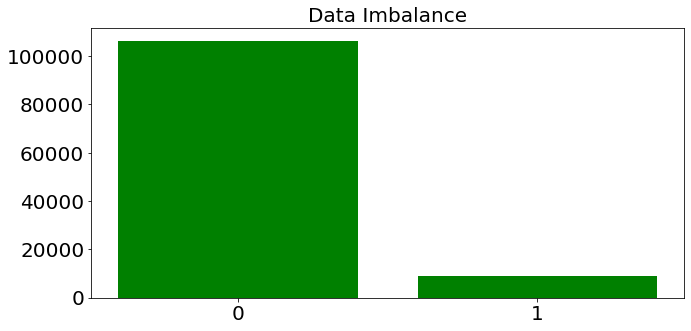

In [72]:
# Count number of fraudulent and non fraudulent transactions
a = df_train['isFraud'].value_counts().index
b = df_train['isFraud'].value_counts().values

# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(a,b, color='green')
plt.title("Data Imbalance")
plt.xticks(df_train['isFraud'].unique())

# Save and show the figure
plt.tight_layout()
plt.show()

## Calculating the Precision, Recall, F1 Score

In [73]:
from sklearn.ensemble import RandomForestClassifier

# The RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', random_state=random_seed)

# Train the random forest classifier on the training data
rfc.fit(X_train, y_train)

# Get the prediction on the validation data
y_val_pred = rfc.predict(X_val)

# Get the precision, recall, f-score and support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred, average='micro')

# Print the precision, recall and f-score
pd.DataFrame([[precision, recall, fscore]], columns=['precision', 'recall', 'f-score'])

,precision,recall,f-score
0,0.974763,0.974763,0.974763


## Feature Importance

In [74]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/feature/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [75]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head(10)

,Features,Importance
0,C1,0.132795
1,TransactionDT,0.0763921
2,C13,0.076227
3,C14,0.0732802
4,C2,0.0547945
5,TransactionAmt,0.0504655
6,card1,0.0386551
7,D8,0.0344041
8,C4,0.0314502
9,C11,0.0311778


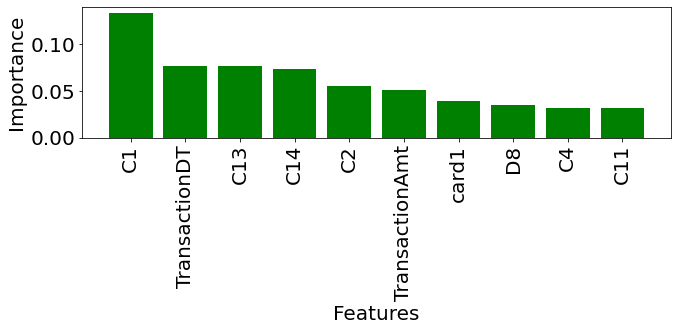

In [76]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:10], df_fi_rfc['Importance'][:10], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/feature/figure/feature_importance_rfc.pdf')
plt.show()

# Reference

Huang, Yuxiao (2021) Case Study (Shallow Neural Networks) [Source code]. https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2021